In [1]:
import pandas as pd
import numpy as np
from BaseDatos import BaseDatos
from AnalisisDatos import AnalisisDatos
from Modelo import Modelo
from RedesNeuronales import RedesNeuronales
from ModeloRandomForest import ModeloRandomForest
from Grafico import Grafico

In [11]:
ruta = r"C:\Users\andre\OneDrive\Escritorio\UCR-TEC\2025\Primer Semestre 2025\Herramientas de Ciencia de Datos II\Proyecto Individual\TablasDatos\basemodelo_brujo.xlsx"
data = BaseDatos(ruta)

In [5]:
datos = data.datos

## ANÁLISIS INICIAL DE LOS DATOS

In [5]:
analisis = AnalisisDatos('basemodelo.csv')

In [6]:
# Detectar valores nulos
nulos = analisis.nulos()

Empty DataFrame
Columns: []
Index: []


In [7]:
# Estadísticas Básicas y Outliers
outliers = analisis.detectar_outliers()

     Unnamed: 0  temperatura      caudal  precipitacion    viento    nino  \
min         0.0    24.207449   32.696667   -4998.580812 -2.674190  24.630   
q1          9.5    25.022287   88.561290   -4996.460961 -1.734190  26.375   
q2         19.0    25.663899  138.416129   -4994.144498 -0.803329  26.930   
q3         28.5    25.959713  283.838710   -4992.087990 -0.049997  27.745   
max        38.0    27.641413  769.290323   -4986.564470  0.738713  28.560   

      humedad  
min  0.016577  
q1   0.017100  
q2   0.017461  
q3   0.017743  
max  0.018368  
         temperatura caudal
Índices         [34]   [19]
Cantidad           1      1


## VISUALIZACIÓN DE DATOS

In [9]:
graficos = Grafico('basemodelo.csv')

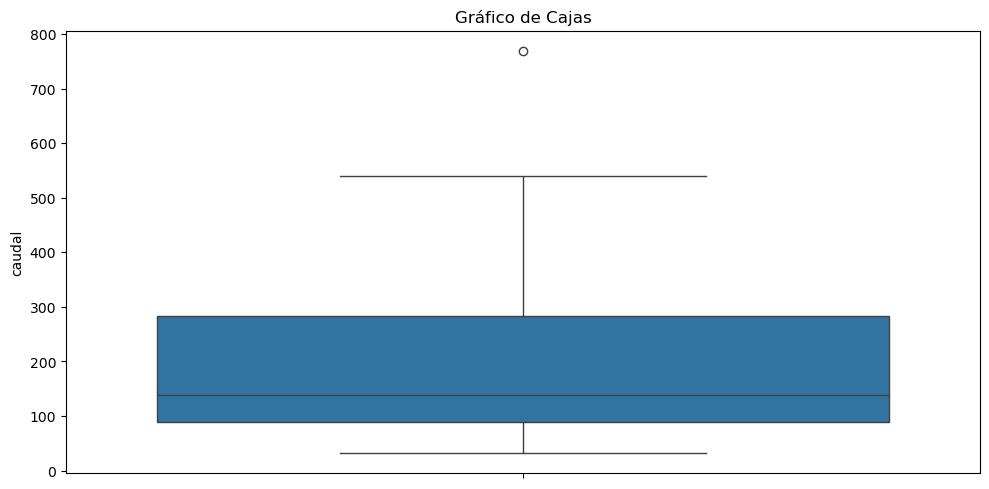

In [49]:
fig_box = graficos.boxplot("caudal")
#graficos.guardar_en_png('boxplot')

'Gráfico guardado como lineas.png'

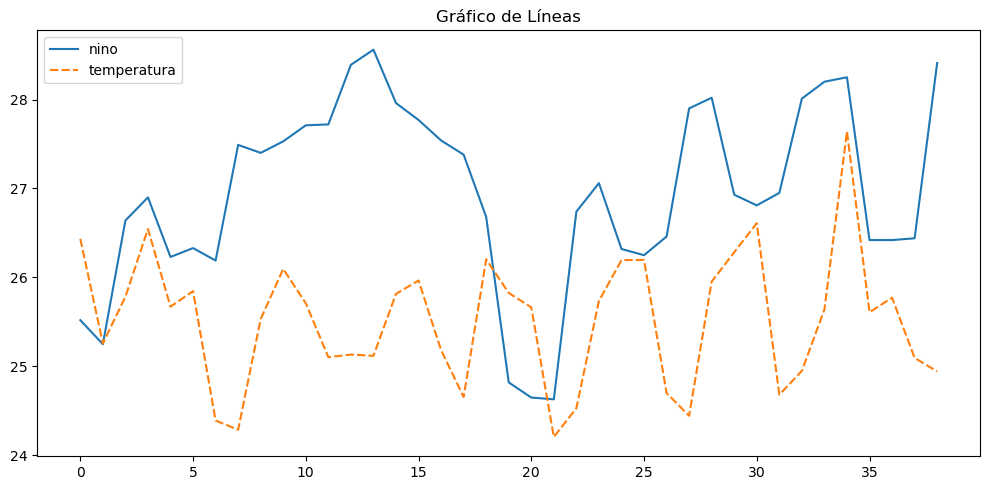

In [11]:
# Gráfico de líneas
fig_line = graficos.linea(['nino', 'temperatura'])
graficos.guardar_en_png('lineas')

'Gráfico guardado como dist_humedad.png'

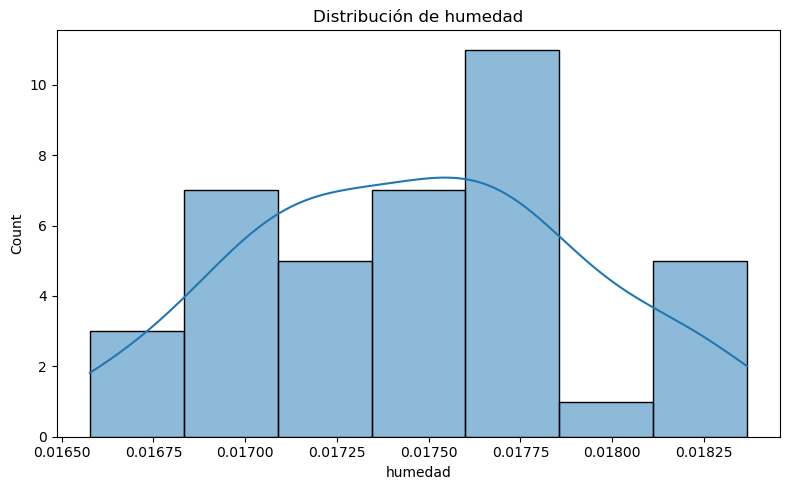

In [12]:
# Gráfico de Distribución
fig_dist = graficos.dist('humedad')
graficos.guardar_en_png('dist_humedad')

'Gráfico guardado como heatmap.png'

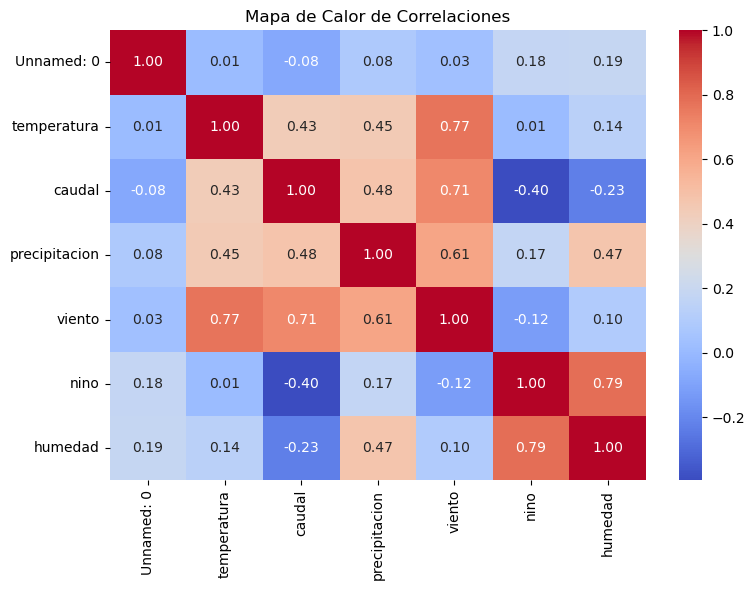

In [13]:
# Gráfico de Correlaciones
fig_heat = graficos.heatmap()
graficos.guardar_en_png('heatmap')

## MODELADO Y ANÁLISIS DE CORRELACIONES

In [15]:
modelo = Modelo('basemodelo.csv')

In [16]:
# 90% de Correlaciones más altas
modelo.top_corr(80)

Correlaciones >= 0.48 (percentil 80):
nino vs humedad -> 0.79
temperatura vs viento -> 0.77
caudal vs viento -> 0.71
precipitacion vs viento -> 0.61
caudal vs precipitacion -> 0.48


In [17]:
# Crear lags para ventas (datos temporales)
modelo.lag(1, 'caudal')
modelo.lag(2, 'caudal')
modelo.lag(3, 'caudal')
modelo.lag(4, 'caudal')
modelo.lag(5, 'caudal')
modelo.lag(6, 'caudal')
modelo.lag(12, 'caudal')
modelo.lag(1, 'nino')
modelo.lag(2, 'nino')
modelo.lag(3, 'nino')
modelo.lag(4, 'nino')
modelo.lag(5, 'nino')
modelo.lag(6, 'nino')
modelo.lag(1, 'nino')
modelo.lag(2, 'nino')
modelo.lag(3, 'nino')
modelo.lag(4, 'nino')
modelo.lag(5, 'nino')
modelo.lag(6, 'nino')
modelo.lag(1, 'temperatura') 
modelo.lag(2, 'temperatura')   
modelo.lag(3, 'temperatura')   
modelo.lag(4, 'temperatura')   
modelo.lag(5, 'temperatura')   
modelo.lag(6, 'temperatura')   
modelo.lag(1, 'precipitacion')    
modelo.lag(2, 'precipitacion')    
modelo.lag(3, 'precipitacion')    
modelo.lag(4, 'precipitacion')    
modelo.lag(5, 'precipitacion')    
modelo.lag(6, 'precipitacion')    

,Unnamed: 0,datetime,temperatura,caudal,precipitacion,viento,nino,humedad,caudal_lag_1,caudal_lag_2,...,temperatura_lag_3,temperatura_lag_4,temperatura_lag_5,temperatura_lag_6,precipitacion_lag_1,precipitacion_lag_2,precipitacion_lag_3,precipitacion_lag_4,precipitacion_lag_5,precipitacion_lag_6
0,0,1984-11-15,26.434470,313.833333,-4995.314599,0.190004,25.52,0.016577,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1984-11-16,25.258352,95.025806,-4997.387685,-2.674190,25.25,0.016784,313.833333,NaN,...,NaN,NaN,NaN,NaN,-4995.314599,NaN,NaN,NaN,NaN,NaN
2,2,1984-11-17,25.783527,34.236667,-4996.459944,-1.719997,26.64,0.017080,95.025806,313.833333,...,NaN,NaN,NaN,NaN,-4997.387685,-4995.314599,NaN,NaN,NaN,NaN
3,3,1984-11-18,26.544776,125.758065,-4993.809159,-0.009675,26.90,0.017490,34.236667,95.025806,...,26.434470,NaN,NaN,NaN,-4996.459944,-4997.387685,-4995.314599,NaN,NaN,NaN
4,4,1984-11-19,25.671400,412.838710,-4991.366396,0.461292,26.23,0.017077,125.758065,34.236667,...,25.258352,26.434470,NaN,NaN,-4993.809159,-4996.459944,-4997.387685,-4995.314599,NaN,NaN
5,5,1984-11-20,25.846354,326.433333,-4994.744150,-0.406664,26.33,0.016977,412.838710,125.758065,...,25.783527,25.258352,26.434470,NaN,-4991.366396,-4993.809159,-4996.459944,-4997.387685,-4995.314599,NaN
6,6,1984-11-21,24.391955,124.432258,-4997.273819,-1.748383,26.19,0.017123,326.433333,412.838710,...,26.544776,25.783527,25.258352,26.434470,-4994.744150,-4991.366396,-4993.809159,-4996.459944,-4997.387685,-4995.314599
7,7,1984-11-22,24.287491,40.476667,-4996.700145,-1.956664,27.49,0.017540,124.432258,326.433333,...,25.671400,26.544776,25.783527,25.258352,-4997.273819,-4994.744150,-4991.366396,-4993.809159,-4996.459944,-4997.387685
8,8,1984-11-23,25.533002,191.635484,-4992.503565,0.074197,27.40,0.018058,40.476667,124.432258,...,25.846354,25.671400,26.544776,25.783527,-4996.700145,-4997.273819,-4994.744150,-4991.366396,-4993.809159,-4996.459944
9,9,1984-11-24,26.095675,539.290323,-4992.415282,-0.187093,27.53,0.017461,191.635484,40.476667,...,24.391955,25.846354,25.671400,26.544776,-4992.503565,-4996.700145,-4997.273819,-4994.744150,-4991.366396,-4993.809159


In [18]:
#Verificar correlaciones con rezagadas
modelo.top_corr(95)

Correlaciones >= 0.57 (percentil 95):
caudal_lag_2 vs caudal_lag_12 -> 0.81
nino vs humedad -> 0.79
temperatura vs viento -> 0.77
nino_lag_4 vs nino_lag_5 -> 0.74
nino_lag_5 vs nino_lag_6 -> 0.73
viento vs temperatura_lag_5 -> 0.72
nino_lag_1 vs nino_lag_2 -> 0.71
caudal vs viento -> 0.71
nino_lag_2 vs nino_lag_3 -> 0.71
nino_lag_3 vs nino_lag_4 -> 0.70
humedad vs nino_lag_1 -> 0.70
nino vs nino_lag_1 -> 0.67
viento vs precipitacion_lag_5 -> 0.66
temperatura vs caudal_lag_5 -> 0.64
caudal_lag_6 vs temperatura_lag_1 -> 0.64
viento vs caudal_lag_5 -> 0.63
precipitacion vs viento -> 0.61
caudal_lag_1 vs precipitacion_lag_6 -> 0.61
temperatura_lag_1 vs temperatura_lag_6 -> 0.59
temperatura vs precipitacion_lag_6 -> 0.59
precipitacion_lag_1 vs precipitacion_lag_6 -> 0.59
caudal_lag_12 vs temperatura_lag_2 -> 0.59
temperatura vs temperatura_lag_5 -> 0.58
viento vs precipitacion_lag_6 -> 0.58
caudal_lag_5 vs precipitacion_lag_6 -> 0.57


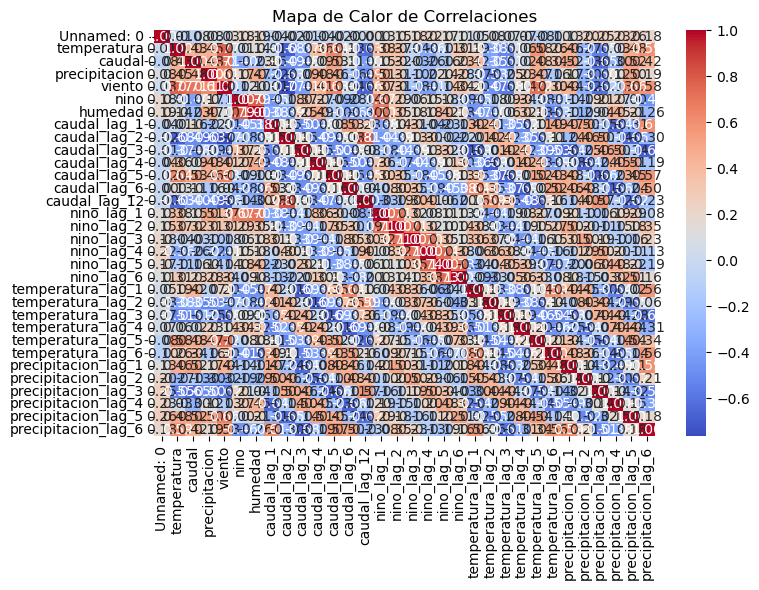

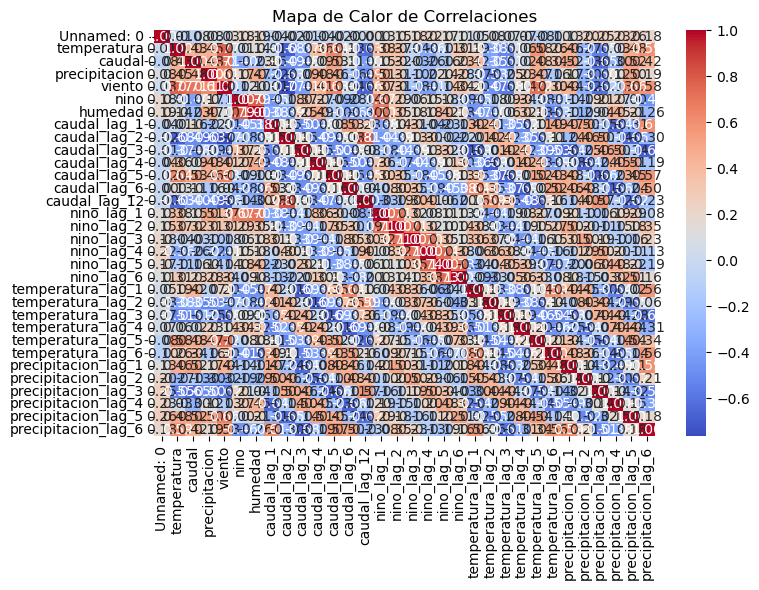

In [19]:
#Heatmap de Correlaciones con rezagos
modelo.heatmap()

In [20]:
x_train, x_test, y_train, y_test = modelo.cargar_datos(["caudal", "datetime"],["caudal"])

In [21]:
modelo.datos.to_csv("datos_modelo.csv")

## MODELOS DE REDES NEURONALES

In [23]:
modelo_rn = RedesNeuronales('datos_modelo.csv')

In [24]:
variables_x = [
    "temperatura", "precipitacion", "viento", "nino",
    "caudal_lag_1", "caudal_lag_2", "caudal_lag_3", "caudal_lag_4", "caudal_lag_5", "caudal_lag_6", "caudal_lag_12",
    "temperatura_lag_1", "temperatura_lag_2", "temperatura_lag_3", "temperatura_lag_4", "temperatura_lag_5", "temperatura_lag_6",
    "precipitacion_lag_1", "precipitacion_lag_2", "precipitacion_lag_3", "precipitacion_lag_4", "precipitacion_lag_5", "precipitacion_lag_6", 
    "nino_lag_1", "nino_lag_2", "nino_lag_3", "nino_lag_4", "nino_lag_5", "nino_lag_6"
]
variable_y = "caudal"

In [25]:
x_esc, y_esc = modelo_rn.preprocesar_datos(variables_x, variable_y)

In [26]:
arquitectura = [ (44, 'relu'), (22, 'relu'), (11, 'relu'), (1, None) ]
modelo = modelo_rn.crear_modelo(capas=arquitectura,learning_rate=0.01,funcion_perdida='mean_squared_error')

C:\Users\andre\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
historial = modelo_rn.entrenar(
    epochs=500,
    verbose=0,
    validation_split=0.2
)

Entrenando el modelo...
Modelo entrenado!


'Gráfico guardado como evolucion.png'

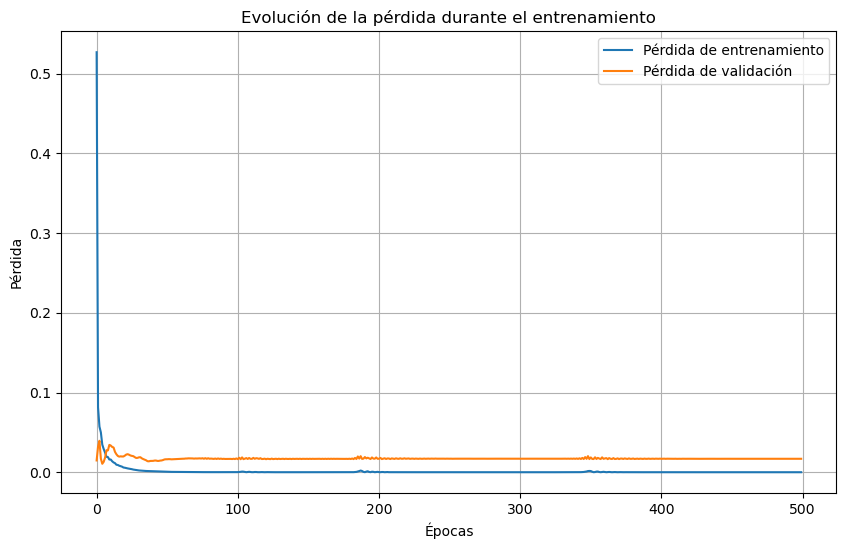

In [28]:
fig_perdidas = modelo_rn.graficar_perdidas()
modelo_rn.guardar_en_png("evolucion")

In [29]:
predicciones = modelo_rn.predecir()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


In [30]:
metricas = modelo_rn.evaluar_modelo(datos[variable_y])

R²: 0.9246
RMSE: 43.3220
MAE: 12.1667
NSE: 0.9246


Modelo guardado como modelo_caudal_rna.h5


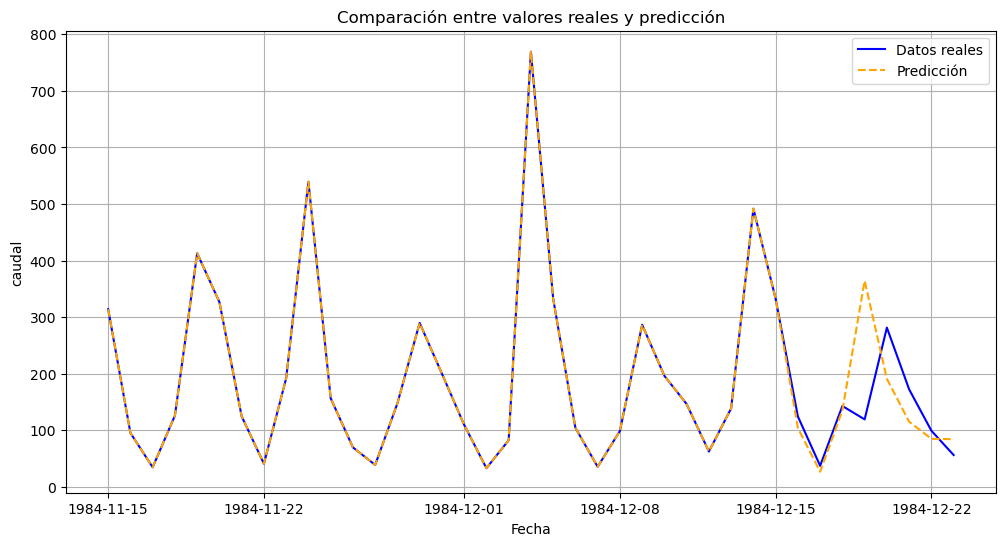

In [31]:
fig_resultados = modelo_rn.graficar_resultados("datetime", variable_y)
modelo_rn.guardar_en_png("comparacion_predicciones")
modelo_rn.guardar_modelo("modelo_caudal_rna")

C:\Users\andre\OneDrive\Escritorio\UCR-TEC\2025\Primer Semestre 2025\Herramientas de Ciencia de Datos II\Proyecto Individual\RedesNeuronales.py:401: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, features = self.__x_escalado, feature_names = self.datos.columns)


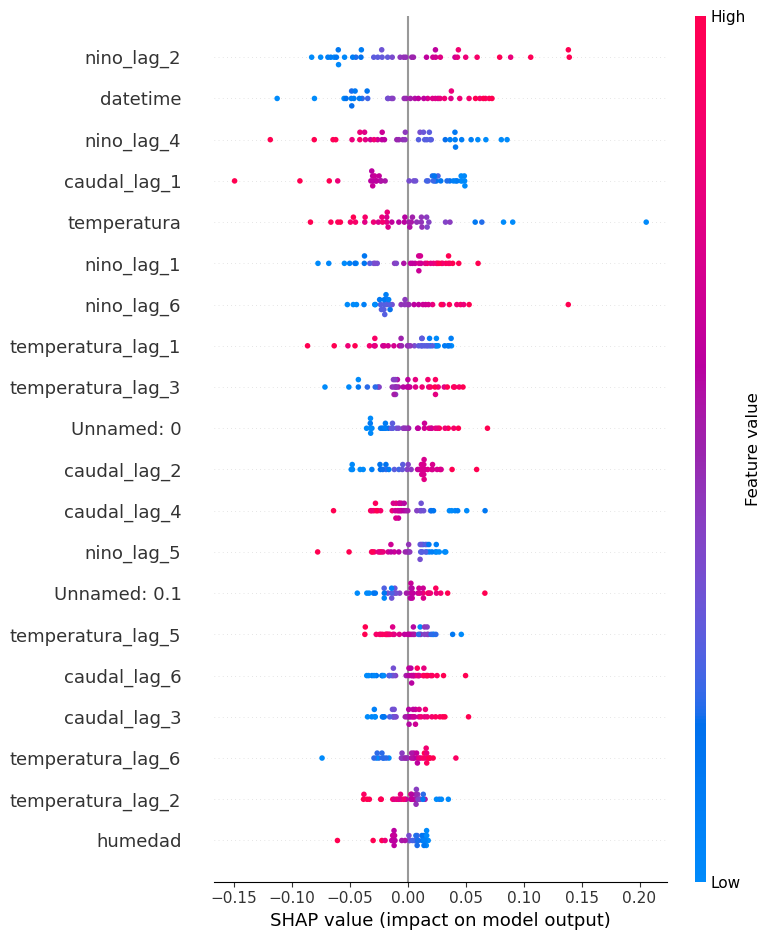

In [32]:
modelo_rn.importancia_shap()

C:\Users\andre\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


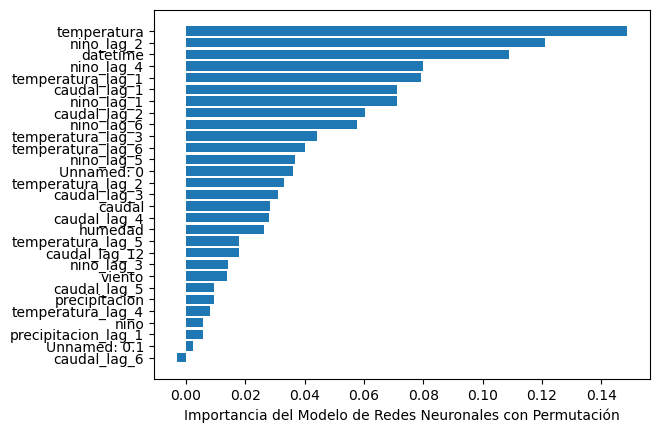

In [33]:
modelo_rn.importancia_permu()

ValueError: The number of FixedLocator locations (29), usually from a call to set_ticks, does not match the number of labels (34).

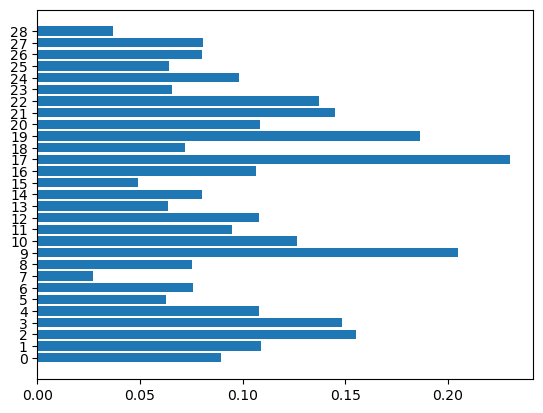

In [34]:
modelo_rn.importancia_grad()

## MODELO RANDOM FOREST

In [35]:
modelo_rf = ModeloRandomForest('datos_modelo.csv', 'caudal' , 'datetime')

In [37]:
modelo_rf.ajustar_modelo()

C:\Users\andre\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [39]:
modelo_rf.evaluar_modelo()

R² (train): 0.9744
R² (test): 0.8532


C:\Users\andre\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\andre\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\andre\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\andre\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

R² promedio (CV): 0.7357

        Métricas de Error:
        - MAE (Error Absoluto Medio): 21.84
        - MSE (Error Cuadrático Medio): 735.25
        - RMSE (Raíz del Error Cuadrático Medio): 27.12
        - MAPE (Error Porcentual Absoluto Medio): 16.01%
        - NSE (Eficiencia Nash–Sutcliffe): 0.8532
        


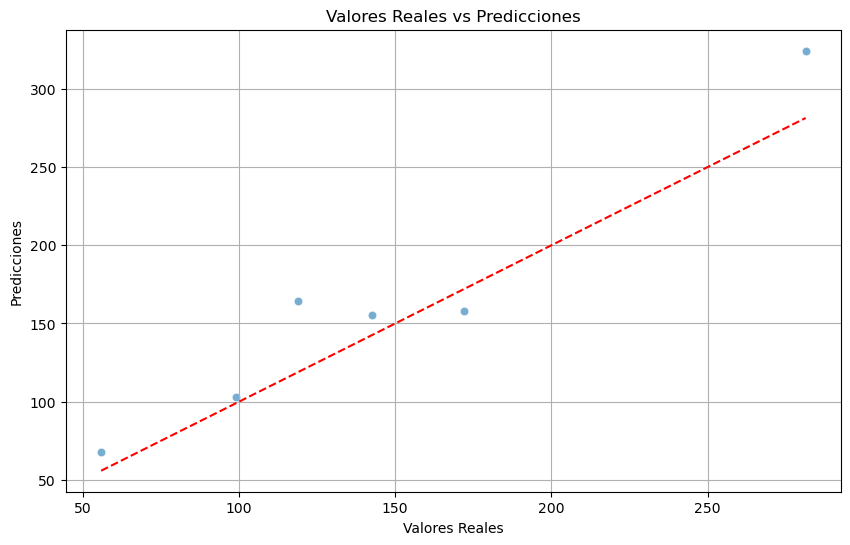

In [41]:
modelo_rf.visualizar_resultados()

                feature  importancia
3                caudal     0.803921
5                viento     0.062166
31  precipitacion_lag_5     0.020171
9          caudal_lag_2     0.011456
20           nino_lag_6     0.010412
4         precipitacion     0.009726
25    temperatura_lag_5     0.008122
22    temperatura_lag_2     0.007256
29  precipitacion_lag_3     0.007119
26    temperatura_lag_6     0.006541
13         caudal_lag_6     0.006365
8          caudal_lag_1     0.006104
10         caudal_lag_3     0.004818
16           nino_lag_2     0.004470
30  precipitacion_lag_4     0.003185
23    temperatura_lag_3     0.002837
12         caudal_lag_5     0.002586
21    temperatura_lag_1     0.002497
7               humedad     0.002417
1            Unnamed: 0     0.002413
24    temperatura_lag_4     0.002299
6                  nino     0.002214
15           nino_lag_1     0.002054
32  precipitacion_lag_6     0.001986
17           nino_lag_3     0.001417
11         caudal_lag_4     0.001056
2

C:\Users\andre\OneDrive\Escritorio\UCR-TEC\2025\Primer Semestre 2025\Herramientas de Ciencia de Datos II\Proyecto Individual\ModeloRandomForest.py:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( x = 'importancia', y='feature', data = df_impor.head(top_n), palette = 'viridis')


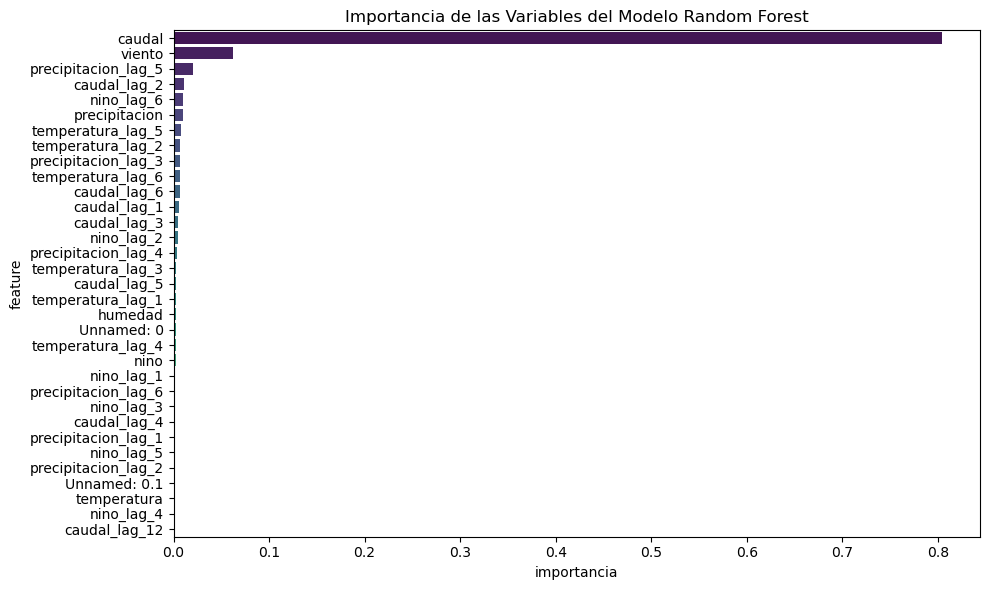

In [43]:
modelo_rf.importancia_feature(40)

                feature  media_importancia  sd_importancia
3                caudal           2.147386        0.755541
25    temperatura_lag_5           0.030609        0.025637
13         caudal_lag_6           0.021294        0.009195
26    temperatura_lag_6           0.016750        0.006256
10         caudal_lag_3           0.010191        0.004652
24    temperatura_lag_4           0.008746        0.008305
5                viento           0.006285        0.023651
31  precipitacion_lag_5           0.005535        0.014032
30  precipitacion_lag_4           0.005215        0.004785
8          caudal_lag_1           0.005018        0.007029
4         precipitacion           0.003285        0.007158
32  precipitacion_lag_6           0.001144        0.003086
19           nino_lag_5           0.000573        0.000678
14        caudal_lag_12           0.000190        0.001217
28  precipitacion_lag_2           0.000038        0.000907
1            Unnamed: 0           0.000000        0.0000

C:\Users\andre\OneDrive\Escritorio\UCR-TEC\2025\Primer Semestre 2025\Herramientas de Ciencia de Datos II\Proyecto Individual\ModeloRandomForest.py:104: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='media_importancia', y='feature', data = df_permu.head(top_n), palette = 'viridis')


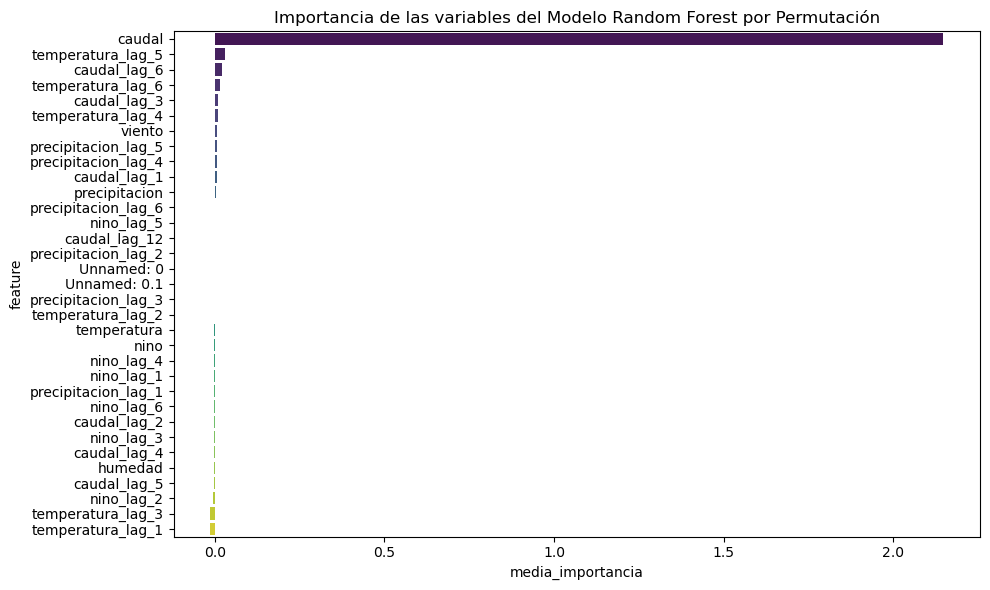

In [45]:
modelo_rf.importancia_permutacion(40)